In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
fminst = tf.keras.datasets.fashion_mnist

In [48]:
(train_images,train_labels),(test_images,test_labels) = fminst.load_data()

LABEL:[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13 

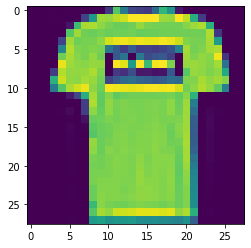

In [50]:
import numpy as np
import matplotlib.pyplot as plt
index = 1
np.set_printoptions(linewidth=320)

print(f'LABEL:{train_images[index]}')
print(f'\nIMAGE PIXEL ARRAY :\n{train_labels[index]}')
plt.imshow(train_images[index])

In [24]:
train_images=train_images/255.0
test_images=test_images/255.0

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [28]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [31]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4681 - accuracy: 0.8349
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4526 - accuracy: 0.8400
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4399 - accuracy: 0.8456
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4298 - accuracy: 0.8485
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4209 - accuracy: 0.8523
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4128 - accuracy: 0.8548


In [32]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4456 - accuracy: 0.8409


[0.4456128776073456, 0.8409000039100647]

In [35]:
classifications = model.predict(test_images)
print(classifications[1])

[3.8371989e-04 7.2664861e-06 9.4979745e-01 6.9728769e-05 1.2915452e-02 3.9207301e-10 3.6753487e-02 1.3450101e-15 7.2900963e-05 9.8788755e-12]


In [36]:
print(test_labels[1])

2


In [46]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0 # Experiment with removing this line
test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2010
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0818
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0530
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0378
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0651
[1.1279288e-09 1.1920740e-08 4.9501690e-08 6.5161126e-05 1.1059928e-12 4.4328026e-08 2.5994002e-13 9.9993467e-01 5.6865543e-09 1.1646601e-07]
7
